In [37]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.io as sio #loadmat

#### Data

In [38]:
mat_contents = sio.loadmat("digits.mat")
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [39]:
x = np.array(mat_contents['X'])
y = np.array(mat_contents['y'])
print(f'x values:{x}')
print(f'y values:{y}')

x values:[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y values:[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]


In [40]:
mat_contents = sio.loadmat("digits.mat")
print(f"Y shape: {y.shape}")
print(f"X shape: {x.shape}. X[0] shape:{x[0].shape}")

Y shape: (5000, 1)
X shape: (5000, 400). X[0] shape:(400,)


#### Data visualization

In [41]:
# x= x.reshape(5000, 20, 20)
# x.shape[0]

In [42]:
def displayData():
    img_vectors = np.array(x.reshape(5000, 20, 20))
    img =img_vectors[1500]
    img = np.transpose(img)
    plt.imshow(img)
   

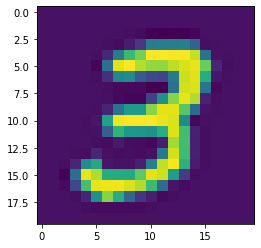

In [43]:
displayData()

#### Hypothesis and cost fucntions

In [44]:
X = np.c_[np.ones((x.shape[0], 1)), x]
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [56]:
X.shape

(5000, 401)

In [59]:
X.T

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
def y_change(y, cl):
    y_pr=[]
    for i in range(0, len(y)):
        if y[i] == cl:
            y_pr.append(1)
        else:
            y_pr.append(0)
    return y_pr

In [46]:
def hypothesis(X, theta):
    z = np.dot(X, theta)
    return 1/(1+np.exp(-(z)))

In [47]:
def cost_function(theta, X, y):
    m = X.shape[0]
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [48]:
def gradient(theta, X, y):
    m = X.shape[0]
    y1 = hypothesis(X, theta)
    return (1/m) * np.dot(X.T, y1 - y)

In [60]:
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [67]:
y1 = hypothesis(X, theta)
y1.shape

(5000, 1)

In [65]:
h =(1/m) * np.dot(X.T, y1 - y)
h.shape

(401, 1)

In [66]:
from scipy.optimize import minimize, fmin_tnc
theta = np.zeros((X.shape[1], 1))
theta.shape

(401, 1)

In [50]:
def fit(X, y, theta):
    opt_weigths = fmin_tnc(func=cost_function, x0=theta,
                          fprime=gradient, args=(X, y.flatten()))
    return opt_weigths[0]

In [51]:
def find_param(X, y, theta):
    y_uniq = list(set(y.flatten()))
    theta_list = []
    for i in y_uniq:
        y_tr = pd.Series(y_change(y, i))
        y_tr = y_tr[:, np.newaxis]
        theta1 = fit(X, y, theta)
        theta_list.append(theta1)
    return theta_list

In [52]:
theta_list = find_param(X, y, theta)

<ipython-input-51-fc9fe74b9681>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_tr = y_tr[:, np.newaxis]
<ipython-input-47-d282ea37fea8>:4: RuntimeWarning: divide by zero encountered in log
  return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))


In [53]:
def predict(theta_list, x, y):
    y_uniq = list(set(y.flatten()))
    y_hat = [0]*len(y)
    for i in range(0, len(y_uniq)):
        y_tr = y_change(y, y_uniq[i])
        y1 = hypothesis(X, theta_list[i])
        for k in range(0, len(y)):
            if y_tr[k] == 1 and y1[k] >= 0.5:
                y_hat[k] = y_uniq[i]
    return y_hat

In [54]:
y_hat = predict(theta_list, X, y)

In [55]:
accuracy=0
for i in range(0, len(y)):
    if y_hat[i] == y.flatten()[i]:
        accuracy += 1
print(accuracy/len(x)*100)

100.0
